<a href="https://colab.research.google.com/github/samyuktha1502/Amazon-Sales-Data/blob/main/Healthcare_satisfaction_of_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. Preparations
2. Description of basic dataset characteristics
3. Data visualisation
4. Stat. tests
5. Conclusion


# 1) Preparations

Import of libraries and load of dataset

In [ ]:
import os

import pandas as pd
import numpy as np
import tqdm
from tqdm.notebook import trange, tqdm

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# statistics
import scipy
import statsmodels

In [ ]:
import pandas as pd

# Define a list of file names
file_list = [
    "cms_hospital_patient_satisfaction_2016.csv",
    "cms_hospital_patient_satisfaction_2017.csv",
    "cms_hospital_patient_satisfaction_2018.csv",
    "cms_hospital_patient_satisfaction_2019.csv",
    "cms_hospital_patient_satisfaction_2020.csv"
]

# Read and concatenate all CSV files
df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)

# Display the first few rows
print(df.head())


<ipython-input-24-407de142780e>:13: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)
<ipython-input-24-407de142780e>:13: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)


  Facility ID                     Facility Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name Phone Number     HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON   3347938701         H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON   3347938701      H_CLEAN_HSP_SN_P   
3  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_U_P   
4  DOTHAN    AL     36301     HOUSTON   3347938701  H_CLEAN_LINEAR_SCORE   

                                     HCAHPS Question  ...  \
0                              

In [ ]:
import pandas as pd

# Define a list of file names
file_list = [
    "cms_hospital_patient_satisfaction_2016.csv",
    "cms_hospital_patient_satisfaction_2017.csv",
    "cms_hospital_patient_satisfaction_2018.csv",
    "cms_hospital_patient_satisfaction_2019.csv",
    "cms_hospital_patient_satisfaction_2020.csv"
]

# Read and concatenate all CSV files
# Assign the concatenated DataFrame to the variable 'data'
data = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)

# Display the first few rows
print(data.head())

<ipython-input-29-d77a02c26ec7>:14: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)
<ipython-input-29-d77a02c26ec7>:14: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)


  Facility ID                     Facility Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name Phone Number     HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON   3347938701         H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON   3347938701      H_CLEAN_HSP_SN_P   
3  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_U_P   
4  DOTHAN    AL     36301     HOUSTON   3347938701  H_CLEAN_LINEAR_SCORE   

                                     HCAHPS Question  ...  \
0                              

# 2) Description of basic dataset characteristics

The data I will work with is *HCAHPS* results for 5 years (2016 - 2020). HCAHPS provides **information on the quality of care hospitals** are providing to their patients. This information can **help consumers make informed decisions about health care**. Hospital Care Compare **allows consumers to select multiple hospitals and directly compare performance measure information related to heart attack, emergency department care, preventive care, and other conditions**.

*(HCAHPS or Hospital Consumer Assessment of Healthcare Providers and Systems is the first national, standardized, publicly reported survey of patients' perspectives of hospital care)*

*Everything about HCAHPS detail I have gotten from here: https://data.cms.gov/provider-data/archived-data/hospitals*

In [ ]:
data.head(3)

Facility ID                     Facility Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name Phone Number HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON   3347938701     H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON   3347938701   H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON   3347938701  H_CLEAN_HSP_SN_P   

                                     HCAHPS Question  ...  \
0                                Summary star rating  ...   
1  Patients who reported that their room and bath...  ...   
2  Patients who reported that their room and bath...  ...   

  Readmission national comparison Readmission national comparison footnote  \
0    Same as the National average                                      NaN   
1    Same as the National average                                      NaN   
2    Same as the National average                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1             Below the National average   
2             Below the National average   

  Patient experience national comparison footnote  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

  Effectiveness of care national comparison  \
0              Same as the National average   
1              Same as the National average   
2              Same as the National average   

  Effectiveness of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   

  Timeliness of care national comparison  \
0           Same as the National average   
1           Same as the National average   
2           Same as the National average   

  Timeliness of care national comparison footnote  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

  Efficient use of medical imaging national comparison  \
0                       Same as the National average     
1                       Same as the National average     
2                       Same as the National average     

  Efficient use of medical imaging national comparison footnote  
0                                                NaN             
1                                                NaN             
2                                                NaN             

[3 rows x 43 columns]

In [ ]:
data.tail(3)

Facility ID          Facility Name        Address    City State  \
264382       670114  WEIMAR MEDICAL CENTER  400 YOUENS DR  WEIMAR    TX   
264383       670114  WEIMAR MEDICAL CENTER  400 YOUENS DR  WEIMAR    TX   
264384       670114  WEIMAR MEDICAL CENTER  400 YOUENS DR  WEIMAR    TX   

        ZIP Code County Name  Phone Number      HCAHPS Measure ID  \
264382     78962    COLORADO    9797258274  H_RECMND_LINEAR_SCORE   
264383     78962    COLORADO    9797258274            H_RECMND_PY   
264384     78962    COLORADO    9797258274   H_RECMND_STAR_RATING   

                                          HCAHPS Question  ...  \
264382             Recommend hospital - linear mean score  ...   
264383  Patients who reported YES, they would probably...  ...   
264384                   Recommend hospital - star rating  ...   

       Readmission national comparison  \
264382                   Not Available   
264383                   Not Available   
264384                   Not Available   

                 Readmission national comparison footnote  \
264382  Results are not available for this reporting p...   
264383  Results are not available for this reporting p...   
264384  Results are not available for this reporting p...   

       Patient experience national comparison  \
264382                          Not Available   
264383                          Not Available   
264384                          Not Available   

          Patient experience national comparison footnote  \
264382  Results are not available for this reporting p...   
264383  Results are not available for this reporting p...   
264384  Results are not available for this reporting p...   

       Effectiveness of care national comparison  \
264382                             Not Available   
264383                             Not Available   
264384                             Not Available   

       Effectiveness of care national comparison footnote  \
264382  Results are not available for this reporting p...   
264383  Results are not available for this reporting p...   
264384  Results are not available for this reporting p...   

       Timeliness of care national comparison  \
264382                          Not Available   
264383                          Not Available   
264384                          Not Available   

          Timeliness of care national comparison footnote  \
264382  Results are not available for this reporting p...   
264383  Results are not available for this reporting p...   
264384  Results are not available for this reporting p...   

       Efficient use of medical imaging national comparison  \
264382                                      Not Available     
264383                                      Not Available     
264384                                      Not Available     

       Efficient use of medical imaging national comparison footnote  
264382  Results are not available for this reporting p...             
264383  Results are not available for this reporting p...             
264384  Results are not available for this reporting p...             

[3 rows x 43 columns]

**Information about composition of dataset**

In [ ]:
data.info(memory_usage = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 1321925 entries, 0 to 264384
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count    Dtype 
---  ------                                                         --------------    ----- 
 0   Facility ID                                                    1321925 non-null  int64 
 1   Facility Name                                                  1321925 non-null  object
 2   Address                                                        1321925 non-null  object
 3   City                                                           1321925 non-null  object
 4   State                                                          1321925 non-null  object
 5   ZIP Code                                                       1321925 non-null  int64 
 6   County Name                                                    1317800 non-null  object
 7   Phone Number                                       

The most significant features in dataframe:

* 'Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', - **general info about hospital**
* 'Patient Survey Star Rating' - **score which person gave to a hospital**
* 'Number of Completed Surveys' - **how many surveys were completed**
* 'Start Date', 'End Date', 'Year' - **date / timeline**
* 'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison', 'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison' - **comparison of different measures with level in country**

In [ ]:
data = data[['Facility ID', 'Facility Name',
             'Address', 'City', 'State', 'ZIP Code', 'County Name',
             'Hospital Type', 'Hospital Ownership', 'Emergency Services',
             'Patient Survey Star Rating', 'Number of Completed Surveys',
             'Start Date', 'End Date', 'Year',
             'Mortality national comparison', 'Safety of care national comparison', 'Readmission national comparison',
             'Patient experience national comparison', 'Effectiveness of care national comparison',
             'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison']]

data.head(1)

Facility ID                     Facility Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name         Hospital Type  \
0  DOTHAN    AL     36301     HOUSTON  Acute Care Hospitals   

                            Hospital Ownership Emergency Services  ...  \
0  Government - Hospital District or Authority                Yes  ...   

   Start Date    End Date  Year Mortality national comparison  \
0  04/01/2015  03/31/2016  2016  Same as the National average   

   Safety of care national comparison Readmission national comparison  \
0          Above the National average    Same as the National average   

  Patient experience national comparison  \
0             Below the National average   

  Effectiveness of care national comparison  \
0              Same as the National average   

  Timeliness of care national comparison  \
0           Same as the National average   

  Efficient use of medical imaging national comparison  
0                       Same as the National average    

[1 rows x 22 columns]

**Basic dataset parameters**


In [ ]:
print(f"There are {data.shape[1]} columns and {data.shape[0]} rows in the dataframe")
print("-" * 75)

print(f'Data is based on results of {data["Year"].max() - data["Year"].min()} years survey (2016 - 2020)')
print(f'Information about {len(data["Facility Name"].unique())} different hospitals from {len(data["County Name"].unique())} counties ({len(data["State"].unique())} states) is represented in this data')
print("-" * 75)
print(f'There are 7 columns like Timeliness or Effectiveness of care national comparison wich describe features that hypothetically can affect on patients` satisfaction ')
print(f'Unfortunately only {data["Patient Survey Star Rating"][(data["Patient Survey Star Rating"] != "Not Applicable") & (data["Patient Survey Star Rating"] != "Not Available")].shape[0]} scores of hospitals are available')

There are 22 columns and 1321925 rows in the dataframe
---------------------------------------------------------------------------
Data is based on results of 0 years survey (2016 - 2020)
Information about 4608 different hospitals from 1564 counties (56 states) is represented in this data
---------------------------------------------------------------------------
There are 7 columns like Timeliness or Effectiveness of care national comparison wich describe features that hypothetically can affect on patients` satisfaction 
Unfortunately only 209880 scores of hospitals are available


# 3) Data visualisation

**3.1) Geolocation of hospital complexes**

In [ ]:
states, count = data["State"].value_counts().keys().to_list()[:25], data["State"].value_counts().to_list()[:25]

for _ in range(5):
    states.append("")
    count.append(0)

for backward_state in data["State"].value_counts().keys().to_list()[51:]:
    states.append(backward_state)
for backward_count in data["State"].value_counts().to_list()[51:]:
    count.append(backward_count)

fig = go.Figure()

fig.add_trace(go.Bar(y = count, x = states,
                     marker_color = '#316395'))

fig.update_layout(shapes=[dict(type =  'line', yref = 'paper', y0 = 0, y1 = 1, xref = 'x', x0 = 25, x1 = 25,
                               line = dict(color = "#DC3912", width = 3, dash = "dot"))])

fig.add_annotation(x = 26, y = 8_000,
                   text="2422",
                   showarrow=False,
                   font = dict(family = "Arial", color = "black", size = 12))
fig.add_annotation(x = 27, y = 5_000,
                   text="692",
                   showarrow=False,
                   font = dict(family = "Arial", color = "black", size = 12))
fig.add_annotation(x = 28, y = 5_000,
                   text="692",
                   showarrow=False,
                   font = dict(family = "Arial", color = "black", size = 12))
fig.add_annotation(x = 29, y = 5_000,
                   text="346",
                   showarrow=False,
                   font = dict(family = "Arial", color = "black", size = 12))
fig.add_annotation(x = 30, y = 5_000,
                   text="346",
                   showarrow=False,
                   font = dict(family = "Arial", color = "black", size = 12))

fig.update_yaxes(categoryorder = 'total ascending')

fig.update_layout(title_text = "Hospitals from which <b>states</b> have <b>the most records</b> in the dataset? <br><sup>Top 25 states by number of mentions in dataset and 5 most backward states",
                  title_font_size = 32)
fig.update_layout(font_family = "Arial", font_size = 16, title_font_family = "Arial", font_color = "black")

fig.update_xaxes(title_text = "State", title_font = dict(size = 18, family = 'Arial', color = 'black'))
fig.update_yaxes(title_text = "Count", title_font = dict(size = 18, family = 'Arial', color = 'black'))

fig.show()

In [ ]:

coords_df = pd.read_csv("uscities.csv")

cities_lowercase = []
for city in coords_df["city"]:
    cities_lowercase.append(city.lower())

coords_df["city"] = cities_lowercase

# longitidy and lattitude
lon = []
lat = []

cities = data["City"].unique()
number_of_hospitals = []

for city in tqdm(cities):
    number_of_hospitals.append(len(data["Facility Name"][data["City"] == city].unique()))

cities_data = pd.DataFrame({"City" : cities, "Count of Hospitals" : number_of_hospitals})

for city in tqdm(cities_data["City"]):
    results = coords_df["lng"][coords_df["city"] == city.lower()].to_list()
    if len(results) == 0:
        results = coords_df["lng"][coords_df["city"] == city.lower() + " "].to_list()
        if len(results) == 0:
            lon.append(np.nan)
        else:
            lon.append(results[0])
    else:
        lon.append(results[0])

    results = coords_df["lat"][coords_df["city"] == city.lower()].to_list()
    if len(results) == 0:
        results = coords_df["lat"][coords_df["city"] == city.lower() + " "].to_list()
        if len(results) == 0:
            lat.append(np.nan)
        else:
            lat.append(results[0])
    else:
        lat.append(results[0])

cities_data["lat"] = lat
cities_data["lon"] = lon

cities_data = cities_data.dropna()

# to correctly show info on geoscatter
hover_info = []
for city in cities_data["City"]:
    hover_info.append(f"City: {city} <br>Count: {cities_data['Count of Hospitals'][cities_data['City'] == city].values[0]}")

cities_data["Hoverinfo"] = hover_info
cities_data

  0%|          | 0/3007 [00:00<?, ?it/s]

  0%|          | 0/3007 [00:00<?, ?it/s]

City  Count of Hospitals      lat       lon  \
0         DOTHAN                   2  31.2335  -85.4069   
1           BOAZ                   2  34.1985  -86.1529   
2       FLORENCE                   8  34.1781  -79.7877   
3            OPP                   1  31.2848  -86.2570   
4        LUVERNE                   2  43.6533  -96.2146   
...          ...                 ...      ...       ...   
3002     Langley                   1  33.5120  -81.8343   
3003  Portsmouth                   1  36.8468  -76.3540   
3004      Tacoma                   1  47.2431 -122.4531   
3005   Bremerton                   1  47.5436 -122.7122   
3006  Oak Harbor                   1  48.2965 -122.6333   

                          Hoverinfo  
0         City: DOTHAN <br>Count: 2  
1           City: BOAZ <br>Count: 2  
2       City: FLORENCE <br>Count: 8  
3            City: OPP <br>Count: 1  
4        City: LUVERNE <br>Count: 2  
...                             ...  
3002     City: Langley <br>Count: 1  
3003  City: Portsmouth <br>Count: 1  
3004      City: Tacoma <br>Count: 1  
3005   City: Bremerton <br>Count: 1  
3006  City: Oak Harbor <br>Count: 1  

[2842 rows x 5 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scattergeo(locationmode = 'USA-states', lon = cities_data['lon'], lat = cities_data['lat'],
                            text = cities_data["Hoverinfo"],
                            marker = dict(size = cities_data["Count of Hospitals"] * 5, sizemode = 'area',
                                          line_color = 'black', line_width = 0.45,
                                          color = "#316395"),
                            geo = 'geo1'))

fig.update_layout(title_text = 'How <b>many hospitals</b> are there in the USA? <br><sup>The dot size is <b>the number of hospitals in each city</b> (multiplied by 5)', showlegend = False)
fig.update_layout(font_family = "Arial", title_font_size = 32, title_font_family = "Arial", font_color = "black")

fig.update_geos(scope = "usa", landcolor = 'rgb(217, 217, 217)', countrycolor = "black",
                framecolor = "black")

fig.show()

**3.2) Hospitals' charasteristics**

In [ ]:
# dataset with info about each unique hospital
#'Hospital Type', 'Hospital Ownership', 'Emergency Services',
hospital_type = []
hospital_ownership = []

for hospital in tqdm(data["Facility Name"].unique()):
    hospital_type.append(data["Hospital Type"][data["Facility Name"] == hospital].to_list()[0])
    hospital_ownership.append(data["Hospital Ownership"][data["Facility Name"] == hospital].to_list()[0])

unique_hospital_data = pd.DataFrame({"Hospital Name" : data["Facility Name"].unique(), "Hospital Type" : hospital_type,
                                     "Hospital Ownership" : hospital_ownership})

unique_hospital_data

100%|██████████| 4608/4608 [18:51<00:00,  4.07it/s]


Hospital Name         Hospital Type  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER  Acute Care Hospitals   
1                         MARSHALL MEDICAL CENTER SOUTH  Acute Care Hospitals   
2                        ELIZA COFFEE MEMORIAL HOSPITAL  Acute Care Hospitals   
3                              MIZELL MEMORIAL HOSPITAL  Acute Care Hospitals   
4                           CRENSHAW COMMUNITY HOSPITAL  Acute Care Hospitals   
...                                                 ...                   ...   
4603  BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...  Acute Care Hospitals   
4604                             ALTUS BAYTOWN HOSPITAL  Acute Care Hospitals   
4605     CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA  Acute Care Hospitals   
4606                       CUMBERLAND SURGICAL HOSPITAL  Acute Care Hospitals   
4607                              WEIMAR MEDICAL CENTER  Acute Care Hospitals   

                               Hospital Ownership  
0     Government - Hospital District or Authority  
1     Government - Hospital District or Authority  
2     Government - Hospital District or Authority  
3                  Voluntary non-profit - Private  
4                                     Proprietary  
...                                           ...  
4603               Voluntary non-profit - Private  
4604                                    Physician  
4605               Voluntary non-profit - Private  
4606                                  Proprietary  
4607                                  Proprietary  

[4608 rows x 3 columns]

In [ ]:
count = unique_hospital_data["Hospital Type"].value_counts().values
types = unique_hospital_data["Hospital Type"].value_counts().keys()
types_cumpercent = count.cumsum() / count.sum() * 100

fig = go.Figure()

fig.add_trace(go.Bar(y = count, x = types,
                     marker_color = '#316395'))

fig.update_yaxes(categoryorder = 'total ascending')

fig.update_layout(title_text = f"Hospitals of <b>what type are most widespread</b> in the USA? <br><sup><b>Acute Care Hospitals</b> accounts for about <b>{round(types_cumpercent[0])}%</b> of total number",
                  title_font_size = 32)
fig.update_layout(font_family = "Arial", font_size = 16, title_font_family = "Arial", font_color = "black")

fig.update_xaxes(title_text = "State", title_font = dict(size = 18, family = 'Arial', color = 'black'))
fig.update_yaxes(title_text = "Count", title_font = dict(size = 18, family = 'Arial', color = 'black'))

fig.show()

In [ ]:
# lets concatenate similar types of ownership in groups

ownership_groups = {"Voluntary non-profit - Private" : "Voluntary non-profit",  "Voluntary non-profit - Other" : "Voluntary non-profit", "Voluntary non-profit - Church" : "Voluntary non-profit",
                    "Proprietary" : "Proprietary", "Physician" : "Proprietary", "Tribal" : "Proprietary",
                    "Department of Defense" : "Government", "Government - Hospital District or Authority" : "Government", "Government - Local" : "Government", "Government - State" : "Government", "Government - Federal" : "Government"}

unique_hospital_data["Hospital Ownership Group"] = unique_hospital_data["Hospital Ownership"].map(ownership_groups)
unique_hospital_data

Hospital Name         Hospital Type  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER  Acute Care Hospitals   
1                         MARSHALL MEDICAL CENTER SOUTH  Acute Care Hospitals   
2                        ELIZA COFFEE MEMORIAL HOSPITAL  Acute Care Hospitals   
3                              MIZELL MEMORIAL HOSPITAL  Acute Care Hospitals   
4                           CRENSHAW COMMUNITY HOSPITAL  Acute Care Hospitals   
...                                                 ...                   ...   
4603  BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...  Acute Care Hospitals   
4604                             ALTUS BAYTOWN HOSPITAL  Acute Care Hospitals   
4605     CONTINUECARE HOSPITAL AT MEDICAL CENTER ODESSA  Acute Care Hospitals   
4606                       CUMBERLAND SURGICAL HOSPITAL  Acute Care Hospitals   
4607                              WEIMAR MEDICAL CENTER  Acute Care Hospitals   

                               Hospital Ownership Hospital Ownership Group  
0     Government - Hospital District or Authority               Government  
1     Government - Hospital District or Authority               Government  
2     Government - Hospital District or Authority               Government  
3                  Voluntary non-profit - Private     Voluntary non-profit  
4                                     Proprietary              Proprietary  
...                                           ...                      ...  
4603               Voluntary non-profit - Private     Voluntary non-profit  
4604                                    Physician              Proprietary  
4605               Voluntary non-profit - Private     Voluntary non-profit  
4606                                  Proprietary              Proprietary  
4607                                  Proprietary              Proprietary  

[4608 rows x 4 columns]

In [ ]:
fig = px.sunburst(unique_hospital_data, path = ["Hospital Ownership Group", "Hospital Ownership"], color = "Hospital Ownership Group",
                 color_discrete_sequence = ["#316395", "#DC3912", "#66AA00"])

fig.update_layout(height = 800, width = 900)

fig.update_layout(title_text = " What <b>type of hospital ownership</b> is the most popular?",
                  title_font_size = 24)
fig.update_layout(font_family = "Arial", font_size = 12, title_font_family = "Arial", font_color = "black")

fig.update_traces(insidetextorientation='radial')

fig.add_annotation(x = 0.95, y = 0.495, ax = 25, ay = 35,
                   text = "Tribal", font = dict(family = "Arial", color = "black", size = 16),
                   showarrow = True, arrowhead = 4,
                   arrowwidth = 1.5, arrowcolor = "black")

fig.show()


**3.3) Survey's results**

There is a value called **'Not Available'** in the columns that represent HCAHPS results. It means I **can't get full information** about each comparison rating.
I will **drop rows with a lack of values** to deal with this problem.

In [ ]:
comparison_dict = {'Same as the national average' : "Same as the NA",
                   'Not Available' : np.nan,
                   'Same as the National average' : "Same as the NA",
                   'Above the national average' : "Above the NA",
                   'Below the national average' : "Below the NA",
                   'Above the National average' : "Above the NA",
                   'Below the National average' : "Below the NA"}

mnc =  data["Mortality national comparison"].map(comparison_dict).dropna() #'Mortality national comparison'
snc = data["Safety of care national comparison"].map(comparison_dict).dropna() #'Safety of care national comparison'
rnc = data["Readmission national comparison"].map(comparison_dict).dropna() #'Readmission national comparison'
penc = data["Patient experience national comparison"].map(comparison_dict).dropna() #'Patient experience national comparison'
efnc = data["Effectiveness of care national comparison"].map(comparison_dict).dropna() #'Effectiveness of care national comparison'
tnc = data["Timeliness of care national comparison"].map(comparison_dict).dropna() #'Timeliness of care national comparison'
unc = data["Efficient use of medical imaging national comparison"].map(comparison_dict).dropna() #'Efficient use of medical imaging national comparison'

In [ ]:
fig = make_subplots(rows = 2, cols = 2,
                    vertical_spacing = 0.1,
                    subplot_titles=("Safety of care rating", "Timeliness of care rating",
                                    "Efficient use of medical imaging rating", "Effectiveness of care rating"
                                    ),
                   specs = [[{"type": "pie"}, {"type": "pie"}],
                           [{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(go.Pie(labels = snc.value_counts().keys().to_list(), values = snc.value_counts().values,
                     marker_colors = ["#109618", "#DC3912", "#FF9900"], hole = 0.3,
                     textinfo = "percent", direction ='clockwise'),
                     col = 1, row = 1)

fig.add_trace(go.Pie(labels = efnc.value_counts().keys().to_list(), values = efnc.value_counts().values,
                     hole = 0.3, sort = True,
                     textinfo = "percent", direction ='clockwise'),
                     col = 2, row = 2)

fig.add_trace(go.Pie(labels = unc.value_counts().keys().to_list(), values = unc.value_counts().values,
                     hole = 0.3, sort = True,
                     textinfo = "percent", direction ='clockwise'),
                     col = 1, row = 2)

fig.add_trace(go.Pie(labels = tnc.value_counts().keys().to_list(), values = tnc.value_counts().values,
                     hole = 0.3, sort = True,
                     textinfo = "percent", direction ='clockwise'),
                     col = 2, row = 1)

fig.update_layout(height = 900, width = 1100)
fig.update_layout(title_text = "<b>Comparison</b> of different <b>care ratings</b> <br><sup><b>Safety of care</b> is the <b>most improving</b> factor. <b>Effectiveness of care</b> is the <b>most stagnating one</b>.",
                  title_font_size = 28)
fig.update_layout(font_family = "Arial", font_size = 14, title_font_family = "Arial", font_color = "black")

fig.update_layout(margin = dict(t = 150))
fig.update_layout(legend_title_text='Comparison groups')

fig.show()

# 4) Hypothesis and statistical tests



> H0: *type of ownership of hospital* **does not affects** on *patients' star rating* => score means are **equivalent** to each other;

> H1: *type of ownership of hospital* **affect** on *patients' star rating* => score means are **not equivalent** to each other;

In [ ]:
scores_dict = {'Not Applicable' : np.nan, "Not Available": np.nan,
               "1" : 1, "2" : 2, "3" : 3, "4" : 4, "5" : 5}

ownership_groups = {"Voluntary non-profit - Private" : "Voluntary non-profit",  "Voluntary non-profit - Other" : "Voluntary non-profit", "Voluntary non-profit - Church" : "Voluntary non-profit",
                    "Proprietary" : "Proprietary", "Physician" : "Proprietary", "Tribal" : "Proprietary",
                    "Department of Defense" : "Government", "Government - Hospital District or Authority" : "Government", "Government - Local" : "Government", "Government - State" : "Government", "Government - Federal" : "Government"}

data_scores = data.copy()
data_scores["Patient Survey Star Rating"] = data["Patient Survey Star Rating"].map(scores_dict)
data_scores["Hospital Ownership"] = data["Hospital Ownership"].map(ownership_groups)

data_scores = data_scores[["Hospital Ownership", "Patient Survey Star Rating"]].dropna()

data_scores

Hospital Ownership  Patient Survey Star Rating
0                  Government                         3.0
5                  Government                         2.0
9                  Government                         3.0
14                 Government                         3.0
19                 Government                         2.0
...                       ...                         ...
1653108  Voluntary non-profit                         3.0
1653113  Voluntary non-profit                         4.0
1653118  Voluntary non-profit                         5.0
1653123  Voluntary non-profit                         4.0
1653124  Voluntary non-profit                         4.0

[196001 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data_scores["Hospital Ownership"] = ord_enc.fit_transform(data_scores[["Hospital Ownership"]])
data_scores

Hospital Ownership  Patient Survey Star Rating
0                       0.0                         3.0
5                       0.0                         2.0
9                       0.0                         3.0
14                      0.0                         3.0
19                      0.0                         2.0
...                     ...                         ...
1653108                 2.0                         3.0
1653113                 2.0                         4.0
1653118                 2.0                         5.0
1653123                 2.0                         4.0
1653124                 2.0                         4.0

[196001 rows x 2 columns]

In this case **both features are categorical** (imagine that Patient Survey Star Rating is also categorical data which represents hospital rating in the scale from worst to best) and they does not depend on each other.

Because of this I should use **chi-square test**.

# correlation matrix


In [ ]:
# correlation matrix
data_scores_corr = data_scores.corr()
print(data_scores_corr)

                            Hospital Ownership  Patient Survey Star Rating
Hospital Ownership                    1.000000                    0.009643
Patient Survey Star Rating            0.009643                    1.000000


In [ ]:
fig = px.histogram(data_scores["Patient Survey Star Rating"], marginal = "box", color_discrete_sequence = ["#316395"])

fig.update_yaxes(title = "Frequency", title_font = dict(size = 18, family = 'Arial', color = 'black'))
fig.update_xaxes(title = "Value", title_font = dict(size = 18, family = 'Arial', color = 'black'))

# hiding x and y axes for marginal plot
fig.update_yaxes(title_text='',row=2, col=1)
fig.update_xaxes(title_text='',row=2, col=1)

fig.update_layout(title = "Distribution of patients' star rating",
                  font_family = "Arial",
                  font_color = "black",
                  title_font_size = 24)

fig.update_layout(showlegend = False)
fig.update_layout(height = 800, width = 1100)

fig.show()


In [ ]:
# removing of outliers
data_scores = data_scores[data_scores["Patient Survey Star Rating"] > 1.0]

In [ ]:
low_scores_count = []
high_scores_count = []
ownership_types = data_scores["Hospital Ownership"].unique()

for ownership_type in ownership_types:
    low_scores_count.append(len(np.where((data_scores["Patient Survey Star Rating"] < 4) & (data_scores["Hospital Ownership"] == ownership_type))[0]))
    high_scores_count.append(len(np.where((data_scores["Patient Survey Star Rating"] >= 4) & (data_scores["Hospital Ownership"] == ownership_type))[0]))

In [ ]:
RC_table = np.array([high_scores_count, low_scores_count])

res = scipy.stats.chi2_contingency(RC_table, correction = True)

print(f"P-value: {res.pvalue} < significance level of 1% (alpha = 0.01)")

P-value: 5.1313740385221735e-124 < significance level of 1% (alpha = 0.01)


> Using a significance level of 1%, I would reject the null hypothesis in favor of the alternative hypothesis that *type of ownership of hospital* **affect** on *patients' star rating*.  

In [ ]:
scores_dict = {'Not Applicable' : np.nan, "Not Available": np.nan,
               "1" : 1, "2" : 2, "3" : 3, "4" : 4, "5" : 5}

ownership_groups = {"Voluntary non-profit - Private" : "Voluntary non-profit",  "Voluntary non-profit - Other" : "Voluntary non-profit", "Voluntary non-profit - Church" : "Voluntary non-profit",
                    "Proprietary" : "Proprietary", "Physician" : "Proprietary", "Tribal" : "Proprietary",
                    "Department of Defense" : "Government", "Government - Hospital District or Authority" : "Government", "Government - Local" : "Government", "Government - State" : "Government", "Government - Federal" : "Government"}

data_scores = data.copy()
data_scores["Patient Survey Star Rating"] = data["Patient Survey Star Rating"].map(scores_dict)
data_scores["Hospital Ownership"] = data["Hospital Ownership"].map(ownership_groups)

data_scores = data_scores[["Hospital Ownership", "Patient Survey Star Rating"]].dropna()

fig = go.Figure()
fig = fig.add_trace(go.Box(x = data_scores["Hospital Ownership"], y = data_scores["Patient Survey Star Rating"],
                           boxmean='sd', marker_color = "#316395"))

fig.update_layout(title_text = f"Ownerships of hospitals and hospitals' stars ratings<br><sup>Scores of <b>Goverment</b> and <b>Voluntary</b> hospitals <b>strongly differ</b> from <b>Poprietary</b>",
                  title_font_size = 32)
fig.update_layout(font_family = "Arial", font_size = 16, title_font_family = "Arial", font_color = "black")

fig.update_xaxes(title_text = "Type of ownership", title_font = dict(size = 18, family = 'Arial', color = 'black'))
fig.update_yaxes(title_text = "Score", title_font = dict(size = 18, family = 'Arial', color = 'black'))

fig.show()

# 5) Conclusion

Finally, I can say that my goal was achieved. I have described dataset using data visualisation, made hypothesis about connections between types of hospitals' ownerships and hospitals' ratings, perfomed chi-square test and due to results of this made a conclusion that scores of goverment and voluntary hospitals differ from poprietary ones.

In [ ]:
import pandas as pd

# Define a list of file names
file_list = [
    "cms_hospital_patient_satisfaction_2016.csv",
    "cms_hospital_patient_satisfaction_2017.csv",
    "cms_hospital_patient_satisfaction_2018.csv",
    "cms_hospital_patient_satisfaction_2019.csv",
    "cms_hospital_patient_satisfaction_2020.csv"
]

# The line below had an extra indent, removing it.
df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)

df.head()

<ipython-input-4-7c6976a10197>:13: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)
<ipython-input-4-7c6976a10197>:13: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)


Facility ID                     Facility Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name Phone Number     HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON   3347938701         H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON   3347938701      H_CLEAN_HSP_SN_P   
3  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_U_P   
4  DOTHAN    AL     36301     HOUSTON   3347938701  H_CLEAN_LINEAR_SCORE   

                                     HCAHPS Question  ...  \
0                                Summary star rating  ...   
1  Patients who reported that their room and bath...  ...   
2  Patients who reported that their room and bath...  ...   
3  Patients who reported that their room and bath...  ...   
4                    Cleanliness - linear mean score  ...   

  Readmission national comparison Readmission national comparison footnote  \
0    Same as the National average                                      NaN   
1    Same as the National average                                      NaN   
2    Same as the National average                                      NaN   
3    Same as the National average                                      NaN   
4    Same as the National average                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1             Below the National average   
2             Below the National average   
3             Below the National average   
4             Below the National average   

  Patient experience national comparison footnote  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Effectiveness of care national comparison  \
0              Same as the National average   
1              Same as the National average   
2              Same as the National average   
3              Same as the National average   
4              Same as the National average   

  Effectiveness of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  Timeliness of care national comparison  \
0           Same as the National average   
1           Same as the National average   
2           Same as the National average   
3           Same as the National average   
4           Same as the National average   

  Timeliness of care national comparison footnote  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Efficient use of medical imaging national comparison  \
0                       Same as the National average     
1                       Same as the National average     
2                       Same as the National average     
3                       Same as the National average     
4                       Same as the National average     

  Efficient use of medical imaging national comparison footnote  
0                                                NaN   

In [ ]:
df['Hospital Type'].value_counts()


Hospital Type
Acute Care Hospitals                  1149842
Critical Access Hospitals              467083
Childrens                               33503
Acute Care - Department of Defense       3255
Name: count, dtype: int64

In [ ]:
# Select only numerical features for correlation analysis.
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix.
correlation_matrix = numerical_features.corr()

# Display the correlation matrix.
print(correlation_matrix)

          ZIP Code      Year
ZIP Code  1.000000  0.002715
Year      0.002715  1.000000


In [ ]:
ownership_counts = df['Hospital Ownership'].value_counts()
print(ownership_counts)

Hospital Ownership
Voluntary non-profit - Private                 724291
Proprietary                                    270862
Government - Hospital District or Authority    188728
Voluntary non-profit - Other                   148028
Government - Local                             139994
Voluntary non-profit - Church                  113337
Physician                                       24483
Government - State                              22891
Government - Federal                            14755
Department of Defense                            3255
Tribal                                           3059
Name: count, dtype: int64


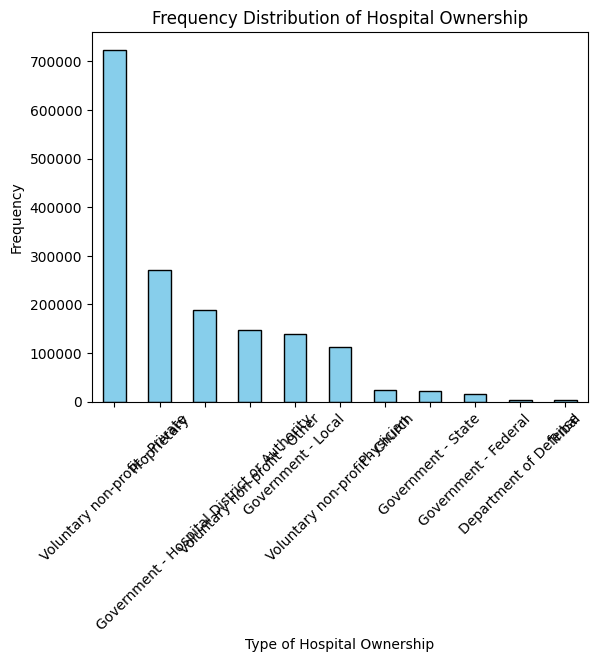

In [ ]:
import matplotlib.pyplot as plt

ownership_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Type of Hospital Ownership")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Hospital Ownership")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.columns


Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Start Date', 'End Date', 'Year', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services',
       'Meets criteria for promoting interoperability of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
      

In [ ]:
# Assuming 'Patient Survey Star Rating' represents patient satisfaction:
# Convert the 'Patient Survey Star Rating' column to numeric, handling errors
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'], errors='coerce')

# Now calculate the mean patient satisfaction per state, ignoring non-numeric values
state_satisfaction = df.groupby("State")["Patient Survey Star Rating"].mean().sort_values(ascending=False)
print(state_satisfaction)

State
WI    3.902653
NE    3.893421
SD    3.852823
MN    3.779528
ME    3.762045
ID    3.696144
KS    3.694730
IA    3.690414
LA    3.629408
CO    3.563240
NH    3.543163
IN    3.528790
VT    3.514116
OR    3.509123
MT    3.500769
WY    3.499355
UT    3.487664
OK    3.443653
OH    3.403635
KY    3.349534
MI    3.344276
TX    3.339248
AL    3.299726
HI    3.271942
SC    3.270703
AR    3.268809
MS    3.251482
NC    3.251057
AK    3.250000
IL    3.227938
MO    3.225376
RI    3.213223
PA    3.176796
WV    3.143753
DE    3.143275
TN    3.138717
VA    3.136332
MA    3.122824
WA    3.093688
ND    3.054745
CT    3.025524
GA    3.023170
AZ    2.869907
NM    2.729167
CA    2.670334
FL    2.630559
MD    2.586347
NJ    2.542746
NY    2.478340
NV    2.460993
DC    2.002577
VI    1.975309
PR    1.666667
AS         NaN
GU         NaN
MP         NaN
Name: Patient Survey Star Rating, dtype: float64


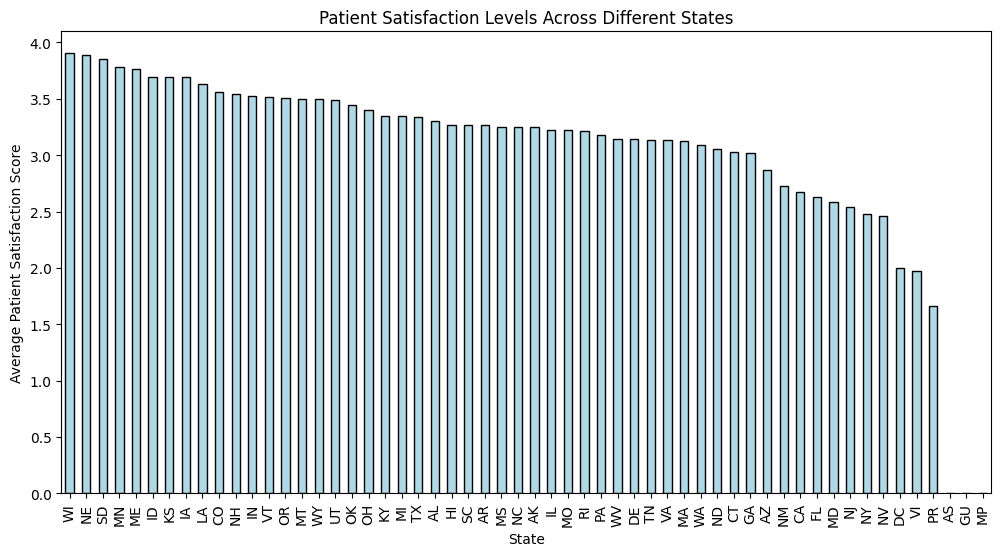

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
state_satisfaction.plot(kind='bar', color='lightblue', edgecolor='black')

plt.xlabel("State")
plt.ylabel("Average Patient Satisfaction Score")
plt.title("Patient Satisfaction Levels Across Different States")
plt.xticks(rotation=90)
plt.show()


In [ ]:
sns.boxplot(x="Actual Column Name", y="Actual Column Name", data=df, palette="coolwarm")


ValueError: Could not interpret value `Actual Column Name` for `x`. An entry with this name does not appear in `data`.

In [ ]:
facility_ratings = df.groupby("Facility Name")["Patient Survey Star Rating"].agg(['count', 'mean', 'min', 'max'])
facility_ratings = facility_ratings.sort_values(by='mean', ascending=False)  # Sort by highest average rating
print(facility_ratings)

                                            count  mean  min  max
Facility Name                                                    
T J HEALTH COLUMBIA                            12   5.0  5.0  5.0
BIGFORK VALLEY HOSPITAL                        46   5.0  5.0  5.0
SOUTHWESTERN REGIONAL MEDICAL CENTER           11   5.0  5.0  5.0
ORTHONEBRASKA HOSPITAL                         11   5.0  5.0  5.0
PATIENTS' HOSPITAL OF REDDING                  35   5.0  5.0  5.0
...                                           ...   ...  ...  ...
WRANGELL MEDICAL CENTER                         0   NaN  NaN  NaN
WRAY COMMUNITY DISTRICT HOSPITAL                0   NaN  NaN  NaN
YOAKUM COUNTY HOSPITAL                          0   NaN  NaN  NaN
YUMA DISTRICT HOSPITAL                          0   NaN  NaN  NaN
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER      0   NaN  NaN  NaN

[5769 rows x 4 columns]


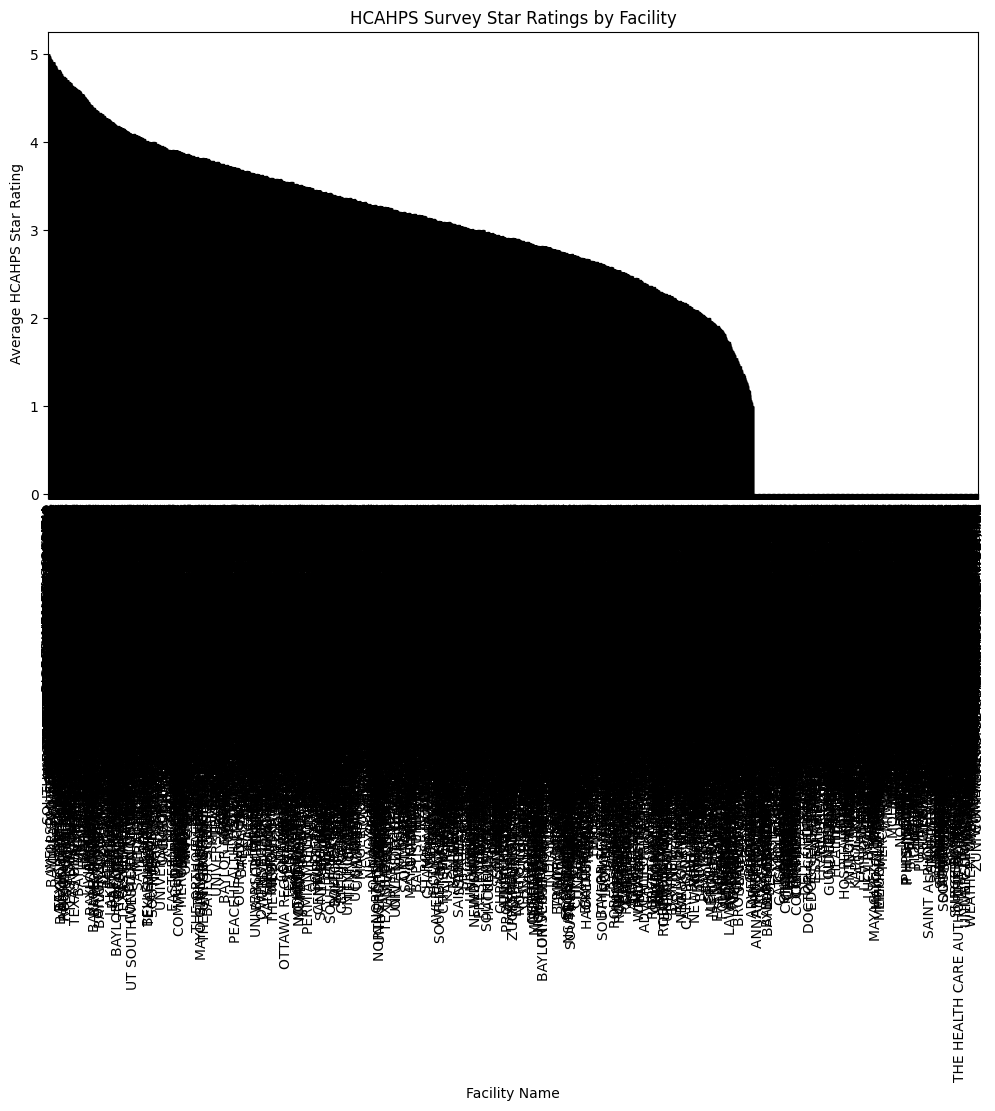

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
facility_ratings['mean'].plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Facility Name")
plt.ylabel("Average HCAHPS Star Rating")
plt.title("HCAHPS Survey Star Ratings by Facility")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import scipy.stats as stats

# Group patient experience scores by hospital type
# Changed "Hospital_Type" to "Hospital Type" to match the actual column name
groups = [df[df["Hospital Type"] == category]["Patient Survey Star Rating"].dropna()
          for category in df["Hospital Type"].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*groups)
print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

ANOVA Results:
F-statistic: nan, p-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


<ipython-input-27-864b81a67047>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hospital Type", y="Patient Survey Star Rating", data=df, palette="coolwarm")


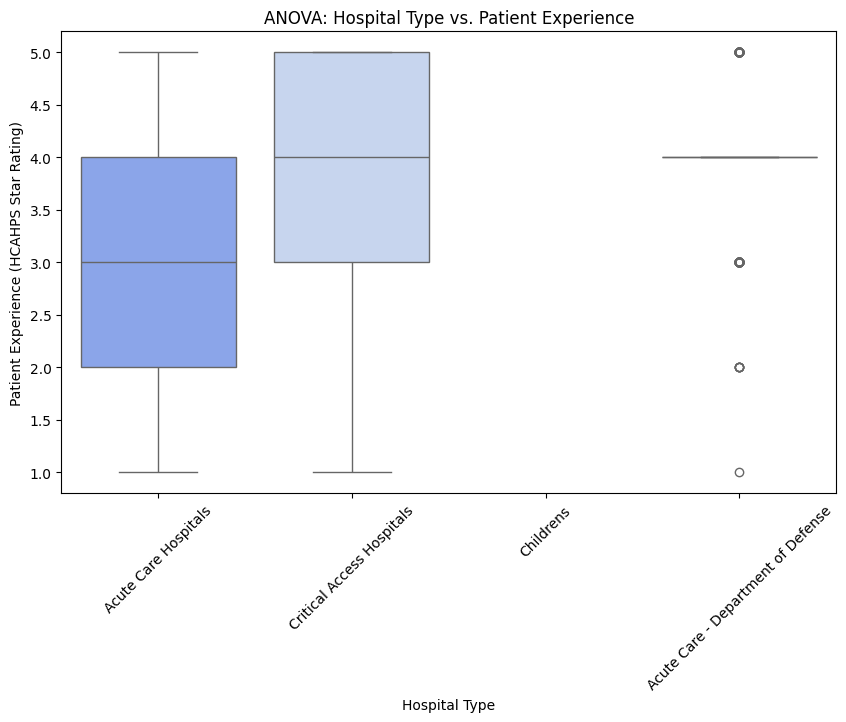

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
# Changed "Hospital_Type" to "Hospital Type" to match the actual column name
sns.boxplot(x="Hospital Type", y="Patient Survey Star Rating", data=df, palette="coolwarm")
plt.xlabel("Hospital Type")
plt.ylabel("Patient Experience (HCAHPS Star Rating)")
plt.title("ANOVA: Hospital Type vs. Patient Experience")
plt.xticks(rotation=45)
plt.show()

ANOVA Results:
F-statistic: 701.0152, p-value: 0.0000

Tukey's HSD Post-Hoc Test:
                                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                                   
                   group1                                      group2                   meandiff p-adj lower upper reject
-------------------------------------------------------------------------------------------------------------------------
                      Department of Defense                        Government - Federal      nan   nan   nan   nan  False
                      Department of Defense Government - Hospital District or Authority      nan   nan   nan   nan  False
                      Department of Defense                          Government - Local      nan   nan   nan   nan  False
                      Department of Defense                          Government - State      nan   nan   nan   nan  False
                      Department of Defense                     

<ipython-input-31-f989d54d20da>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hospital Ownership', y='Patient Survey Star Rating', data=df, palette="coolwarm")


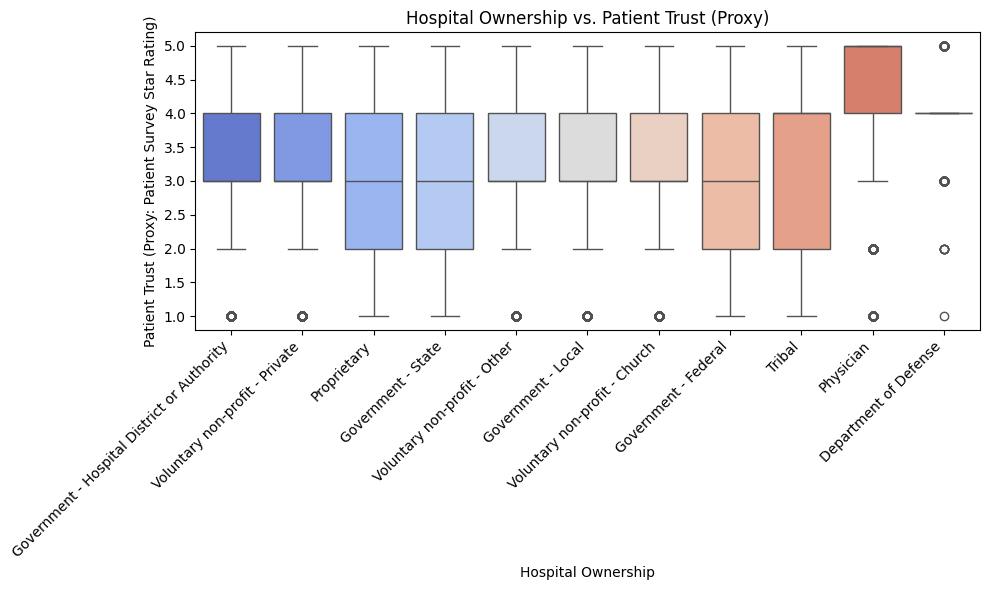

In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# and 'Patient Survey Star Rating' represents patient trust

# 1. Perform ANOVA
# Group patient trust scores by hospital ownership
groups = [df[df['Hospital Ownership'] == category]['Patient Survey Star Rating'].dropna()
          for category in df['Hospital Ownership'].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*groups)

# Print results
print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

# 2. Post-hoc Analysis (if ANOVA is significant)
if anova_result.pvalue < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    # Perform Tukey's HSD post-hoc test
    tukey_result = pairwise_tukeyhsd(df['Patient Survey Star Rating'], df['Hospital Ownership'], alpha=0.05)
    print("\nTukey's HSD Post-Hoc Test:")
    print(tukey_result)

# 3. Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hospital Ownership', y='Patient Survey Star Rating', data=df, palette="coolwarm")
plt.title('Hospital Ownership vs. Patient Trust (Proxy)')
plt.xlabel('Hospital Ownership')
plt.ylabel('Patient Trust (Proxy: Patient Survey Star Rating)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

ANOVA Results:
F-statistic: 2301.9302, p-value: 0.0000


<ipython-input-32-94c981ac68a8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emergency Services', y='Patient Survey Star Rating', data=df, palette="coolwarm")


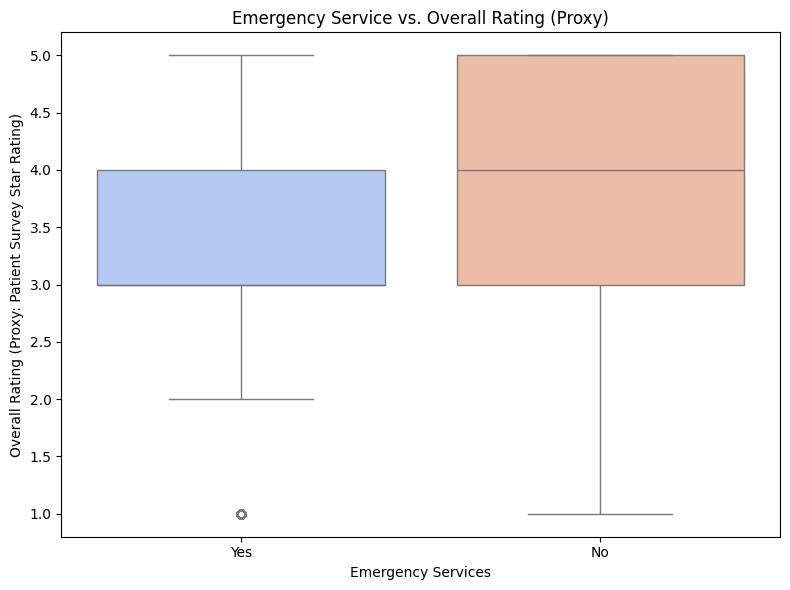

In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# and 'Patient Survey Star Rating' represents the overall rating

# 1. Perform ANOVA
# Group overall ratings by emergency service availability
groups = [df[df['Emergency Services'] == category]['Patient Survey Star Rating'].dropna()
          for category in df['Emergency Services'].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*groups)

# Print results
print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

# 2. Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Emergency Services', y='Patient Survey Star Rating', data=df, palette="coolwarm")
plt.title('Emergency Service vs. Overall Rating (Proxy)')
plt.xlabel('Emergency Services')
plt.ylabel('Overall Rating (Proxy: Patient Survey Star Rating)')
plt.tight_layout()
plt.show()

                                   OLS Regression Results                                  
Dep. Variable:     Q("Patient Survey Star Rating")   R-squared:                       0.434
Model:                                         OLS   Adj. R-squared:                  0.434
Method:                              Least Squares   F-statistic:                 1.470e+05
Date:                             Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                                     05:15:24   Log-Likelihood:            -2.1654e+05
No. Observations:                           192025   AIC:                         4.331e+05
Df Residuals:                               192023   BIC:                         4.331e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                  coef    std err          t      P>|t|      [0.

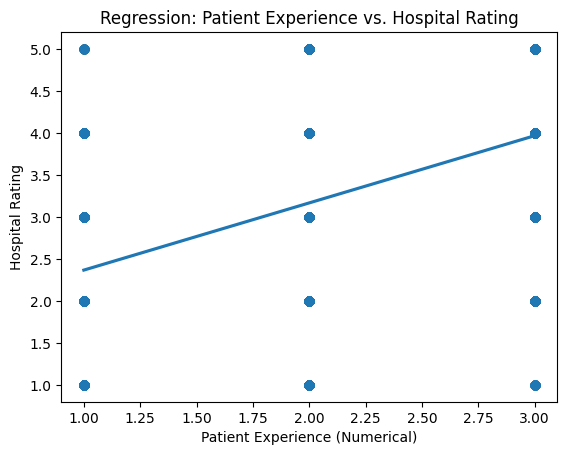

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming 'df' is your DataFrame and has columns:
# 'Patient experience national comparison' and 'Patient Survey Star Rating'

# 1. Data Preparation: Convert categorical to numerical
# Map patient experience categories to numerical values (e.g., Below = 1, Same = 2, Above = 3)
experience_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                      'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['Patient experience num'] = df['Patient experience national comparison'].map(experience_mapping)

# 2. Remove 'Not Applicable' or 'Not Available'
df = df[df['Patient experience national comparison'] != 'Not Applicable']
df = df[df['Patient experience national comparison'] != 'Not Available']
df = df[df['Patient Survey Star Rating'] != 'Not Applicable']
df = df[df['Patient Survey Star Rating'] != 'Not Available']


# Convert hospital rating to numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'])

# 3. Perform Linear Regression
# Define the regression formula
formula = 'Q("Patient Survey Star Rating") ~ Q("Patient experience num")'  # Use Q() for variables with spaces in names

# Fit the model
model = smf.ols(formula, data=df).fit()

# 4. Print Regression Results
print(model.summary())

# 5. Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='Patient experience num', y='Patient Survey Star Rating', data=df)
plt.title('Regression: Patient Experience vs. Hospital Rating')
plt.xlabel('Patient Experience (Numerical)')
plt.ylabel('Hospital Rating')
plt.show()

                                   OLS Regression Results                                  
Dep. Variable:     Q("Patient Survey Star Rating")   R-squared:                       0.038
Model:                                         OLS   Adj. R-squared:                  0.038
Method:                              Least Squares   F-statistic:                     7225.
Date:                             Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                                     05:16:37   Log-Likelihood:            -2.4946e+05
No. Observations:                           182204   AIC:                         4.989e+05
Df Residuals:                               182202   BIC:                         4.989e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                           coef    std err          t      P>|t|      [0.025    

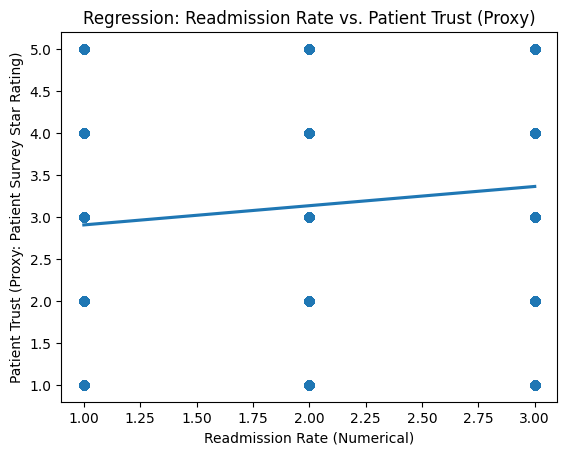

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming 'df' is your DataFrame and has columns:
# 'Readmission national comparison' and 'Patient Survey Star Rating'

# 1. Data Preparation: Convert categorical to numerical
# Map readmission rate categories to numerical values (e.g., Below = 1, Same = 2, Above = 3)
readmission_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                       'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['Readmission num'] = df['Readmission national comparison'].map(readmission_mapping)

# 2. Remove 'Not Applicable' or 'Not Available'
df = df[df['Readmission national comparison'] != 'Not Applicable']
df = df[df['Readmission national comparison'] != 'Not Available']
df = df[df['Patient Survey Star Rating'] != 'Not Applicable']
df = df[df['Patient Survey Star Rating'] != 'Not Available']

# Convert 'Patient Survey Star Rating' to numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'])

# 3. Perform Linear Regression
# Define the regression formula
formula = 'Q("Patient Survey Star Rating") ~ Q("Readmission num")'  # Use Q() for variables with spaces in names

# Fit the model
model = smf.ols(formula, data=df).fit()

# 4. Print Regression Results
print(model.summary())

# 5. Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='Readmission num', y='Patient Survey Star Rating', data=df)
plt.title('Regression: Readmission Rate vs. Patient Trust (Proxy)')
plt.xlabel('Readmission Rate (Numerical)')
plt.ylabel('Patient Trust (Proxy: Patient Survey Star Rating)')
plt.show()

                                   OLS Regression Results                                  
Dep. Variable:     Q("Patient Survey Star Rating")   R-squared:                       0.007
Model:                                         OLS   Adj. R-squared:                  0.007
Method:                              Least Squares   F-statistic:                     1219.
Date:                             Thu, 06 Mar 2025   Prob (F-statistic):          3.18e-266
Time:                                     05:18:19   Log-Likelihood:            -2.3658e+05
No. Observations:                           172607   AIC:                         4.732e+05
Df Residuals:                               172605   BIC:                         4.732e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                             coef    std err          t      P>|t|      [0.025  

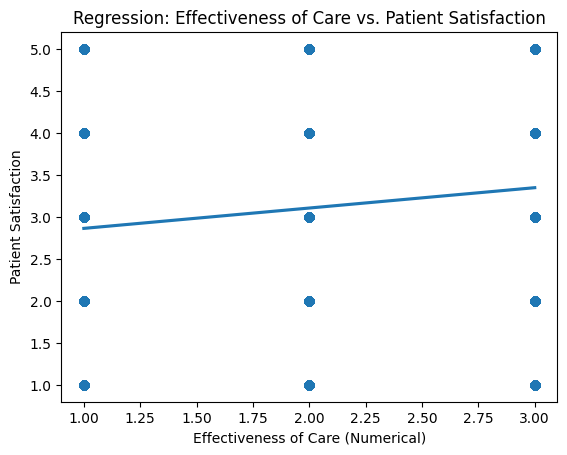

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming 'df' is your DataFrame and has columns:
# 'Effectiveness of care national comparison' and 'Patient Survey Star Rating'

# 1. Data Preparation: Convert categorical to numerical
# Map effectiveness of care categories to numerical values (e.g., Below = 1, Same = 2, Above = 3)
effectiveness_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                         'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['Effectiveness num'] = df['Effectiveness of care national comparison'].map(effectiveness_mapping)

# 2. Remove 'Not Applicable' or 'Not Available'
df = df[df['Effectiveness of care national comparison'] != 'Not Applicable']
df = df[df['Effectiveness of care national comparison'] != 'Not Available']
df = df[df['Patient Survey Star Rating'] != 'Not Applicable']
df = df[df['Patient Survey Star Rating'] != 'Not Available']

# Convert 'Patient Survey Star Rating' to numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'])

# 3. Perform Linear Regression
# Define the regression formula
formula = 'Q("Patient Survey Star Rating") ~ Q("Effectiveness num")'  # Use Q() for variables with spaces in names

# Fit the model
model = smf.ols(formula, data=df).fit()

# 4. Print Regression Results
print(model.summary())

# 5. Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='Effectiveness num', y='Patient Survey Star Rating', data=df)
plt.title('Regression: Effectiveness of Care vs. Patient Satisfaction')
plt.xlabel('Effectiveness of Care (Numerical)')
plt.ylabel('Patient Satisfaction')
plt.show()

                                   OLS Regression Results                                  
Dep. Variable:     Q("Patient Survey Star Rating")   R-squared:                       0.102
Model:                                         OLS   Adj. R-squared:                  0.102
Method:                              Least Squares   F-statistic:                 1.923e+04
Date:                             Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                                     05:19:27   Log-Likelihood:            -2.2301e+05
No. Observations:                           169603   AIC:                         4.460e+05
Df Residuals:                               169601   BIC:                         4.460e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                          coef    std err          t      P>|t|      [0.025     

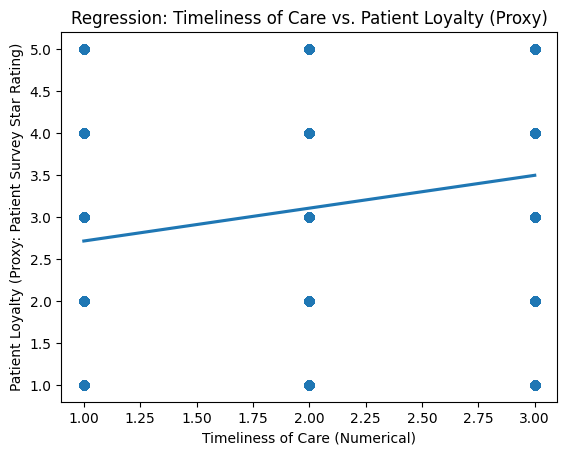

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming 'df' is your DataFrame and has columns:
# 'Timeliness of care national comparison' and 'Patient Survey Star Rating'

# 1. Data Preparation: Convert categorical to numerical
# Map timeliness of care categories to numerical values (e.g., Below = 1, Same = 2, Above = 3)
timeliness_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                      'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['Timeliness num'] = df['Timeliness of care national comparison'].map(timeliness_mapping)

# 2. Remove 'Not Applicable' or 'Not Available'
df = df[df['Timeliness of care national comparison'] != 'Not Applicable']
df = df[df['Timeliness of care national comparison'] != 'Not Available']
df = df[df['Patient Survey Star Rating'] != 'Not Applicable']
df = df[df['Patient Survey Star Rating'] != 'Not Available']

# Convert 'Patient Survey Star Rating' to numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'])

# 3. Perform Linear Regression
# Define the regression formula
formula = 'Q("Patient Survey Star Rating") ~ Q("Timeliness num")'  # Use Q() for variables with spaces in names

# Fit the model
model = smf.ols(formula, data=df).fit()

# 4. Print Regression Results
print(model.summary())

# 5. Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='Timeliness num', y='Patient Survey Star Rating', data=df)
plt.title('Regression: Timeliness of Care vs. Patient Loyalty (Proxy)')
plt.xlabel('Timeliness of Care (Numerical)')
plt.ylabel('Patient Loyalty (Proxy: Patient Survey Star Rating)')
plt.show()

                                   OLS Regression Results                                  
Dep. Variable:     Q("Patient Survey Star Rating")   R-squared:                       0.000
Model:                                         OLS   Adj. R-squared:                  0.000
Method:                              Least Squares   F-statistic:                     64.40
Date:                             Thu, 06 Mar 2025   Prob (F-statistic):           1.02e-15
Time:                                     05:20:37   Log-Likelihood:            -1.9801e+05
No. Observations:                           149295   AIC:                         3.960e+05
Df Residuals:                               149293   BIC:                         3.960e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                coef    std err          t      P>|t|      [0.02

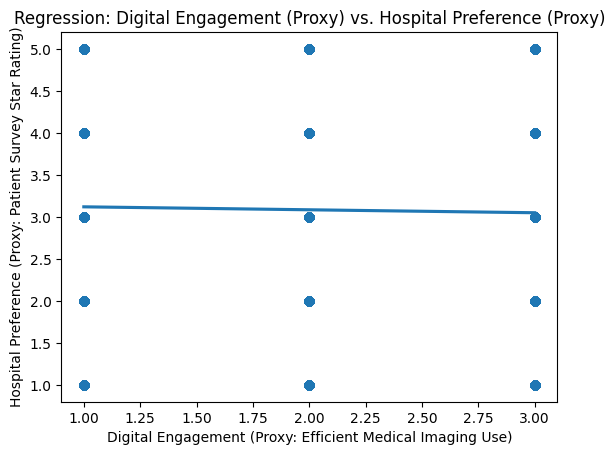

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming 'df' is your DataFrame and has columns:
# 'Efficient use of medical imaging national comparison' and 'Patient Survey Star Rating'

# 1. Data Preparation: Convert categorical to numerical
# Map digital engagement (efficient medical imaging use) to numerical values
engagement_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                         'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['DigitalEngagementNum'] = df['Efficient use of medical imaging national comparison'].map(engagement_mapping)

# 2. Remove 'Not Applicable' or 'Not Available'
df = df[df['Efficient use of medical imaging national comparison'] != 'Not Applicable']
df = df[df['Efficient use of medical imaging national comparison'] != 'Not Available']
df = df[df['Patient Survey Star Rating'] != 'Not Applicable']
df = df[df['Patient Survey Star Rating'] != 'Not Available']

# Convert 'Patient Survey Star Rating' to numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'])

# 3. Perform Linear Regression
formula = 'Q("Patient Survey Star Rating") ~ Q("DigitalEngagementNum")'
model = smf.ols(formula, data=df).fit()

# 4. Print Regression Results
print(model.summary())

# 5. Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='DigitalEngagementNum', y='Patient Survey Star Rating', data=df)
plt.title('Regression: Digital Engagement (Proxy) vs. Hospital Preference (Proxy)')
plt.xlabel('Digital Engagement (Proxy: Efficient Medical Imaging Use)')
plt.ylabel('Hospital Preference (Proxy: Patient Survey Star Rating)')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and has a column named 'Hospital Type'

# 1. Get the counts of each hospital type
hospital_type_counts = df['Hospital Type'].value_counts()

# 2. Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(x='Hospital Type', data=df, order=hospital_type_counts.index, palette='viridis')  # Use 'viridis' or any other color palette
plt.title('Distribution of Hospital Types in the Dataset')
plt.xlabel('Hospital Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

KeyError: 'Hospital Type'

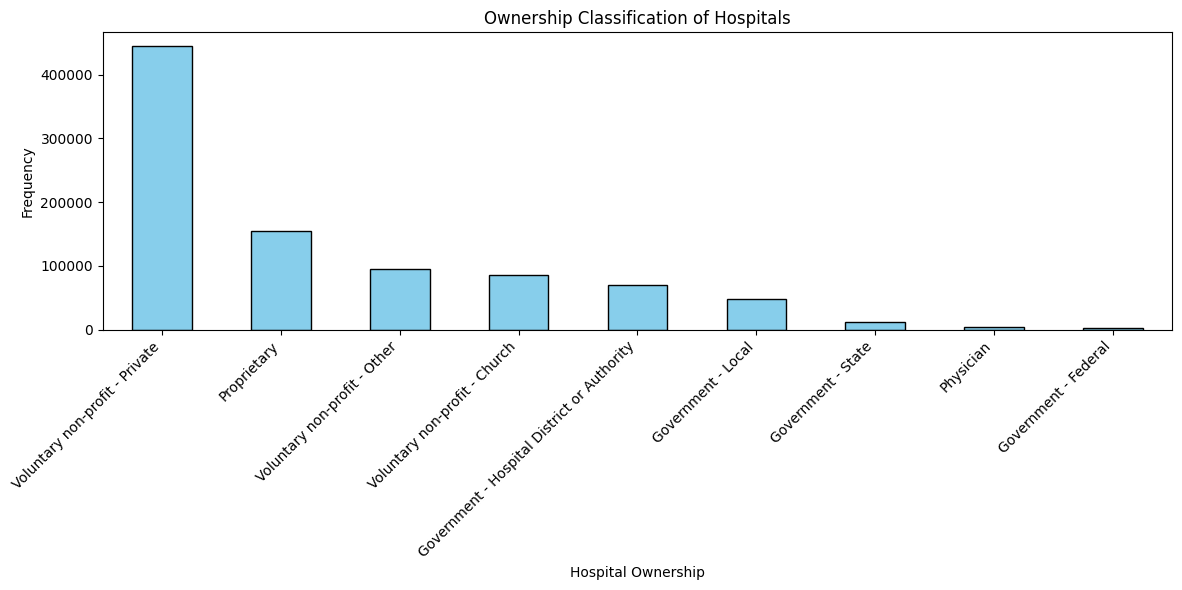

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and has a column named 'Hospital Ownership'

# 1. Get ownership counts
ownership_counts = df['Hospital Ownership'].value_counts()

# 2. Create bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ownership_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ownership Classification of Hospitals')
plt.xlabel('Hospital Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

State
WI    3.747698
ME    3.664336
MN    3.596395
SD    3.548338
NE    3.536623
KS    3.502144
IA    3.490984
NH    3.450689
MT    3.445238
OR    3.442674
CO    3.434182
VT    3.432749
IN    3.390445
UT    3.356278
LA    3.344256
AK    3.325949
ID    3.317280
WY    3.309524
HI    3.297248
RI    3.285714
MI    3.281748
OH    3.253547
OK    3.238290
KY    3.235452
SC    3.227848
AL    3.194342
MO    3.180237
DE    3.169184
NC    3.141581
AR    3.140157
MS    3.139108
IL    3.123843
TX    3.121994
VA    3.114431
TN    3.107290
MA    3.057569
CT    3.030100
PA    3.016524
WV    2.995125
WA    2.980488
GA    2.922072
ND    2.832474
AZ    2.763068
CA    2.669249
FL    2.641577
MD    2.627196
NM    2.590494
NJ    2.569792
NY    2.539648
NV    2.444444
DC    2.060109
Name: Patient Survey Star Rating, dtype: float64


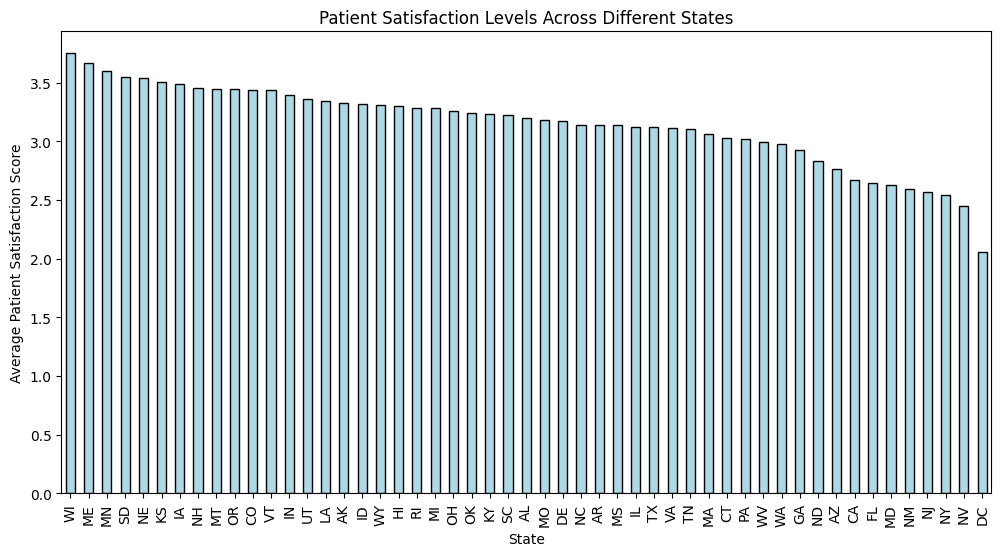

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Patient Survey Star Rating' represents patient satisfaction:
# Convert the 'Patient Survey Star Rating' column to numeric, handling errors
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'], errors='coerce')

# Now calculate the mean patient satisfaction per state, ignoring non-numeric values
state_satisfaction = df.groupby("State")["Patient Survey Star Rating"].mean().sort_values(ascending=False)
print(state_satisfaction)

plt.figure(figsize=(12,6))
state_satisfaction.plot(kind='bar', color='lightblue', edgecolor='black')

plt.xlabel("State")
plt.ylabel("Average Patient Satisfaction Score")
plt.title("Patient Satisfaction Levels Across Different States")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming 'df' is your DataFrame
# and 'Patient Survey Star Rating' represents patient trust

# 1. Data Preparation: Convert categorical to numerical
# Map effectiveness of care categories to numerical values (e.g., Below = 1, Same = 2, Above = 3)
effectiveness_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                         'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['Effectiveness_Num'] = df['Effectiveness of care national comparison'].map(effectiveness_mapping)

# Ensure 'Patient Survey Star Rating' is numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'], errors='coerce')

# Remove rows with missing values
df = df.dropna(subset=['Effectiveness_Num', 'Patient Survey Star Rating'])

# 2. Calculate Correlation (Point-Biserial Correlation)
# Since one variable is categorical (now numeric) and the other is continuous, use point-biserial correlation
correlation, p_value = stats.pointbiserialr(df['Effectiveness_Num'], df['Patient Survey Star Rating'])

# 3. Print Results
print("Correlation between Hospital Effectiveness and Patient Trust:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between hospital effectiveness and patient trust.")
else:
    print("There is no statistically significant correlation between hospital effectiveness and patient trust.")

Correlation between Hospital Effectiveness and Patient Trust:
Correlation coefficient: 0.0766
p-value: 0.0000
There is a statistically significant correlation between hospital effectiveness and patient trust.


                                   OLS Regression Results                                  
Dep. Variable:     Q("Patient Survey Star Rating")   R-squared:                       0.000
Model:                                         OLS   Adj. R-squared:                  0.000
Method:                              Least Squares   F-statistic:                     64.40
Date:                             Thu, 06 Mar 2025   Prob (F-statistic):           1.02e-15
Time:                                     05:52:32   Log-Likelihood:            -1.9801e+05
No. Observations:                           149295   AIC:                         3.960e+05
Df Residuals:                               149293   BIC:                         3.960e+05
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                coef    std err          t      P>|t|      [0.02

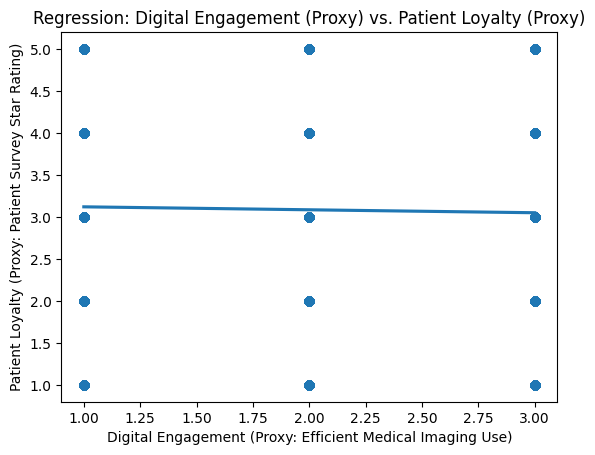

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming 'df' is your DataFrame and has columns:
# 'Efficient use of medical imaging national comparison' and 'Patient Survey Star Rating'

# 1. Data Preparation: Convert categorical to numerical
# Map digital engagement (efficient medical imaging use) to numerical values
engagement_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                         'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['DigitalEngagementNum'] = df['Efficient use of medical imaging national comparison'].map(engagement_mapping)

# 2. Remove 'Not Applicable' or 'Not Available'
df = df[df['Efficient use of medical imaging national comparison'] != 'Not Applicable']
df = df[df['Efficient use of medical imaging national comparison'] != 'Not Available']
df = df[df['Patient Survey Star Rating'] != 'Not Applicable']
df = df[df['Patient Survey Star Rating'] != 'Not Available']

# Convert 'Patient Survey Star Rating' to numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'])

# 3. Perform Linear Regression
formula = 'Q("Patient Survey Star Rating") ~ Q("DigitalEngagementNum")'
model = smf.ols(formula, data=df).fit()

# 4. Print Regression Results
print(model.summary())

# 5. Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='DigitalEngagementNum', y='Patient Survey Star Rating', data=df)
plt.title('Regression: Digital Engagement (Proxy) vs. Patient Loyalty (Proxy)')
plt.xlabel('Digital Engagement (Proxy: Efficient Medical Imaging Use)')
plt.ylabel('Patient Loyalty (Proxy: Patient Survey Star Rating)')
plt.show()

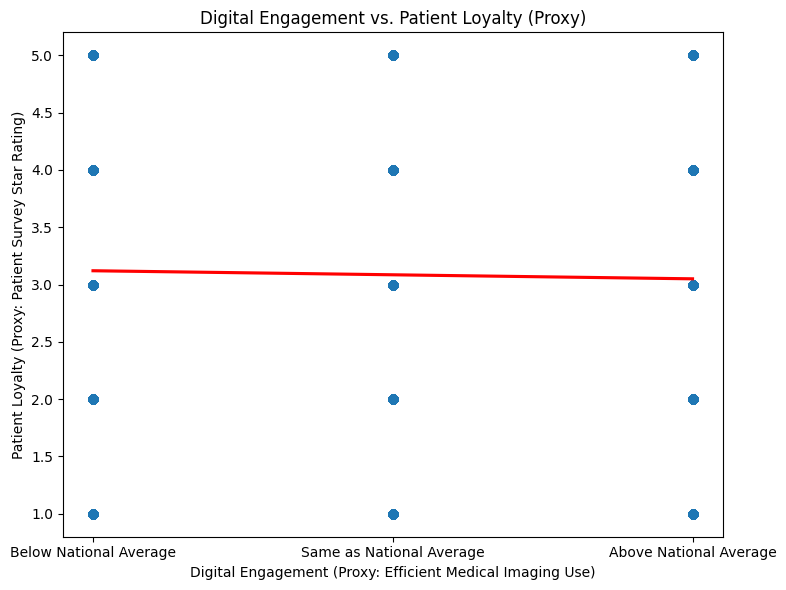

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and has columns:
# 'Efficient use of medical imaging national comparison' and 'Patient Survey Star Rating'

# 1. Data Preparation: Convert categorical to numerical
# Map digital engagement (efficient medical imaging use) to numerical values
engagement_mapping = {'Below the national average': 1, 'Same as the national average': 2, 'Above the national average': 3,
                         'Below the National average': 1, 'Same as the National average': 2, 'Above the National average': 3}
df['DigitalEngagementNum'] = df['Efficient use of medical imaging national comparison'].map(engagement_mapping)

# 2. Remove 'Not Applicable' or 'Not Available'
df = df[df['Efficient use of medical imaging national comparison'] != 'Not Applicable']
df = df[df['Efficient use of medical imaging national comparison'] != 'Not Available']
df = df[df['Patient Survey Star Rating'] != 'Not Applicable']
df = df[df['Patient Survey Star Rating'] != 'Not Available']

# Convert 'Patient Survey Star Rating' to numeric
df['Patient Survey Star Rating'] = pd.to_numeric(df['Patient Survey Star Rating'])

# 3. Perform Linear Regression (for the regression line)
formula = 'Q("Patient Survey Star Rating") ~ Q("DigitalEngagementNum")'
model = smf.ols(formula, data=df).fit()

# 4. Create Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.regplot(x='DigitalEngagementNum', y='Patient Survey Star Rating', data=df,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})  # Customize scatter and line
plt.title('Digital Engagement vs. Patient Loyalty (Proxy)')
plt.xlabel('Digital Engagement (Proxy: Efficient Medical Imaging Use)')
plt.ylabel('Patient Loyalty (Proxy: Patient Survey Star Rating)')
plt.xticks([1, 2, 3], ['Below National Average', 'Same as National Average', 'Above National Average'])
plt.tight_layout()
plt.show()

In [ ]:
import os

# Path to the newly uploaded file
new_file_path = "/mnt/data/Healthcare satisfaction of Customers"

# Checking the file type
file_type = os.path.splitext(new_file_path)[-1]
file_type


''

In [ ]:
# Attempt to read the first few bytes of the file to determine its type
try:
    with open(new_file_path, "rb") as f:
        file_header = f.read(512)  # Read first 512 bytes

    file_header[:100]  # Previewing first 100 bytes
except Exception as e:
    str(e)


In [ ]:
!pip install textblob nltk seaborn matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

# Define a list of file names
file_list = [
    "cms_hospital_patient_satisfaction_2016.csv",
    "cms_hospital_patient_satisfaction_2017.csv",
    "cms_hospital_patient_satisfaction_2018.csv",
    "cms_hospital_patient_satisfaction_2019.csv",
    "cms_hospital_patient_satisfaction_2020.csv"
]

# Read and concatenate all CSV files
# Assign the concatenated DataFrame to the variable 'data'
data = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)

# Display the first few rows
print(data.head())

<ipython-input-5-d77a02c26ec7>:14: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)
<ipython-input-5-d77a02c26ec7>:14: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)


  Facility ID                     Facility Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name Phone Number     HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON   3347938701         H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON   3347938701      H_CLEAN_HSP_SN_P   
3  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_U_P   
4  DOTHAN    AL     36301     HOUSTON   3347938701  H_CLEAN_LINEAR_SCORE   

                                     HCAHPS Question  ...  \
0                              

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Replace 'review_text' with an actual column name from your dataset.
# Here, I assume 'Facility Name' is a column for demonstration.
data['sentiment'] = data['Facility Name'].apply(get_sentiment)
data.head()

Facility ID                     Facility Name                 Address  \
0       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4       10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name Phone Number     HCAHPS Measure ID  \
0  DOTHAN    AL     36301     HOUSTON   3347938701         H_STAR_RATING   
1  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_A_P   
2  DOTHAN    AL     36301     HOUSTON   3347938701      H_CLEAN_HSP_SN_P   
3  DOTHAN    AL     36301     HOUSTON   3347938701       H_CLEAN_HSP_U_P   
4  DOTHAN    AL     36301     HOUSTON   3347938701  H_CLEAN_LINEAR_SCORE   

                                     HCAHPS Question  ...  \
0                                Summary star rating  ...   
1  Patients who reported that their room and bath...  ...   
2  Patients who reported that their room and bath...  ...   
3  Patients who reported that their room and bath...  ...   
4                    Cleanliness - linear mean score  ...   

  Readmission national comparison footnote  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Patient experience national comparison  \
0             Below the National average   
1             Below the National average   
2             Below the National average   
3             Below the National average   
4             Below the National average   

  Patient experience national comparison footnote  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Effectiveness of care national comparison  \
0              Same as the National average   
1              Same as the National average   
2              Same as the National average   
3              Same as the National average   
4              Same as the National average   

  Effectiveness of care national comparison footnote  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  Timeliness of care national comparison  \
0           Same as the National average   
1           Same as the National average   
2           Same as the National average   
3           Same as the National average   
4           Same as the National average   

  Timeliness of care national comparison footnote  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Efficient use of medical imaging national comparison  \
0                       Same as the National average     
1                       Same as the National average     
2                       Same as the National average     
3                       Same as the National average     
4                       Same as the National average     

  Efficient use of medical imaging national comparison footnote sentiment  
0                                                NaN             Negative  
1                                                NaN             Negative  
2                                                NaN             Negative  
3        

sentiment
Neutral     1041643
Negative     524346
Positive      87694
Name: count, dtype: int64


<ipython-input-10-38d6f0b1f94d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


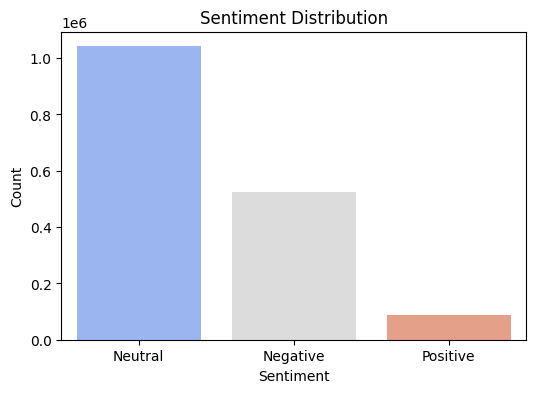

In [ ]:
sentiment_counts = data['sentiment'].value_counts()  # Use 'data' instead of 'df'
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
import re
from nltk.corpus import stopwords

!pip install nltk
import nltk

nltk.download('punkt')
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Assuming you want to apply it to the DataFrame named 'data' from input 5
data['cleaned_words'] = data['Facility Name'].apply(clean_text) # Changed 'df' to 'data' and 'review_text' to 'Facility Name'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-14-62293157b0f9>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


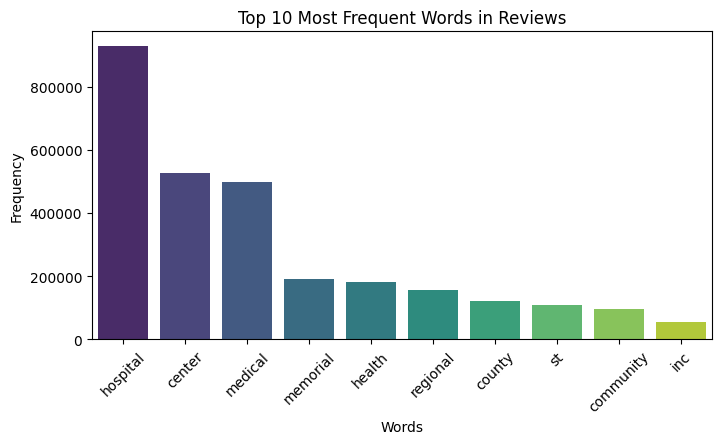

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter  # Import Counter

import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

# Assuming you want to apply it to the DataFrame named 'data' from input 5
data['cleaned_words'] = data['Facility Name'].apply(clean_text) # Changed 'df' to 'data' and 'review_text' to 'Facility Name'


# Flatten the list of cleaned words
all_words = [word for sublist in data['cleaned_words'] for word in sublist]

# Calculate word frequencies using Counter
word_frequencies = Counter(all_words)

# Get the 10 most common words
common_words = word_frequencies.most_common(10)  # Calculate common_words here

# Now you can use common_words
words, counts = zip(*common_words)

plt.figure(figsize=(8,4))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words in Reviews")
plt.show()